In [1]:
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import exp, log, pi, sqrt, sum

# SciPy
from scipy.fft import fft, fftfreq, rfft2, irfft2

In [2]:
picture = []
with open("blur.txt") as file:
    for line in file:
        tmp = line.rstrip().split(" ")
        picture.append(tmp)
        
picture = np.array(picture, float)

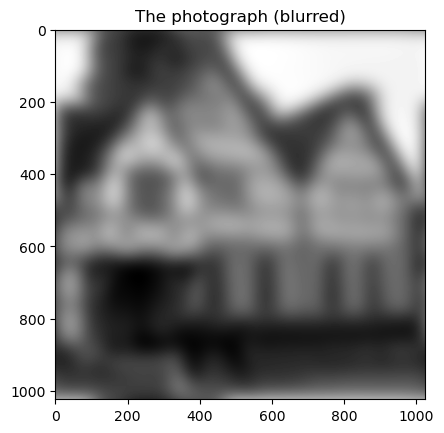

In [3]:
plt.imshow( picture, cmap='gray')
 
plt.title( "The photograph (blurred)" )
plt.show()

In [4]:
xlen = len(picture[0])
ylen = len(picture)

In [5]:
def gaussian(x, y, sigma=25):
    return exp(-1*((x**2 + y**2)/(2*(sigma**2))))

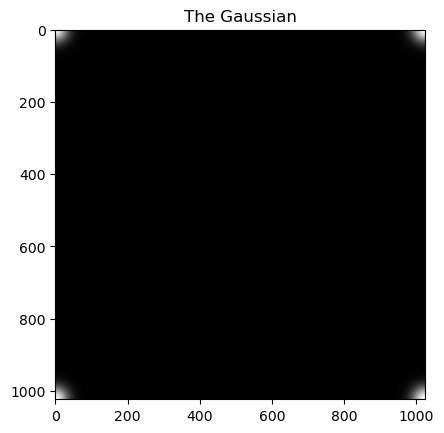

In [6]:
gauss = np.zeros((xlen, ylen))
for i in range(-ylen//2,(ylen//2)):
    for j in range(-xlen//2,(xlen//2)):
        gauss[i][j] = gaussian(j, i)
        

plt.imshow(gauss, cmap='gray')
 
plt.title( "The Gaussian" )
plt.show()

In [7]:
g_k1 = rfft2(picture)
g_k2 = rfft2(gauss)

a_f1 = np.zeros((xlen, ylen), complex)

for i in range(ylen):
    for j in range(xlen//2):
        if g_k2[i][j] < 10**-3:
            a_f1[i][j] = (g_k1[i][j])/(10**-3)
        else:
            a_f1[i][j] = g_k1[i][j]/(g_k2[i][j])

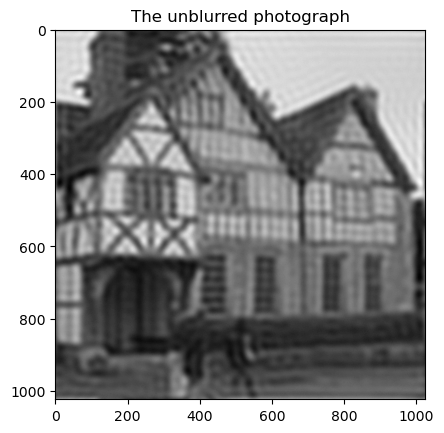

In [8]:
plt.imshow(irfft2(a_f1, s=(1024,1024)), cmap='gray')
 
plt.title( "The unblurred photograph" )
plt.show()